## Import seabprn and fetch dataset "mpg"

In [3]:
import seaborn as sns
import pandas as pd

df = sns.load_dataset("mpg")
df


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


## EDA Explorattory Data Analysis

In [4]:
df.shape

(398, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [6]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [7]:
df[["cylinders", "horsepower", "weight"]].describe()
df = df.dropna()

In [8]:
X, y = df.drop(["mpg", "displacement", "acceleration", "model_year", "name", "origin"], axis=1), df["mpg"]
X, y

(     cylinders  horsepower  weight
 0            8       130.0    3504
 1            8       165.0    3693
 2            8       150.0    3436
 3            8       150.0    3433
 4            8       140.0    3449
 ..         ...         ...     ...
 393          4        86.0    2790
 394          4        52.0    2130
 395          4        84.0    2295
 396          4        79.0    2625
 397          4        82.0    2720
 
 [392 rows x 3 columns],
 0      18.0
 1      15.0
 2      18.0
 3      16.0
 4      17.0
        ... 
 393    27.0
 394    44.0
 395    32.0
 396    28.0
 397    31.0
 Name: mpg, Length: 392, dtype: float64)

In [9]:
X.head()

,cylinders,horsepower,weight
0,8,130.0,3504
1,8,165.0,3693
2,8,150.0,3436
3,8,150.0,3433
4,8,140.0,3449


In [10]:
y.head()


0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

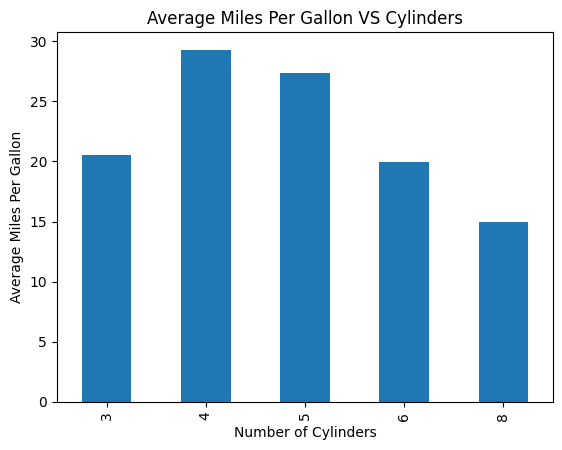

In [11]:
import matplotlib.pyplot as plt
mpg_mean_cylinders = df.groupby("cylinders")["mpg"].mean()

mpg_mean_cylinders.plot(kind="bar")
plt.xlabel("Number of Cylinders")
plt.ylabel("Average Miles Per Gallon")
plt.title("Average Miles Per Gallon VS Cylinders")
plt.show()

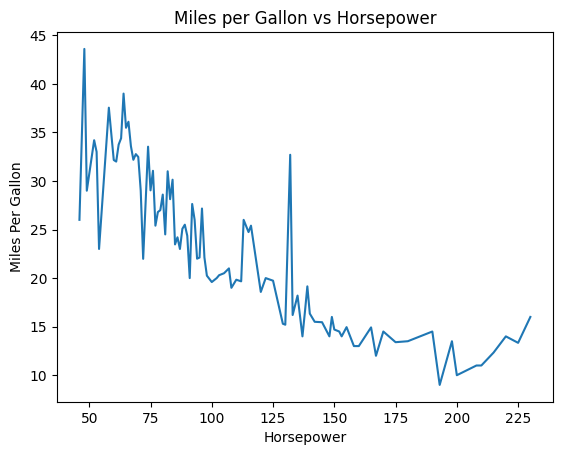

In [12]:
mpg_mean_horsepower = df.groupby("horsepower")["mpg"].mean()

mpg_mean_horsepower.plot(kind="line")

plt.xlabel("Horsepower")
plt.ylabel("Miles Per Gallon")
plt.title("Miles per Gallon vs Horsepower")
plt.show()

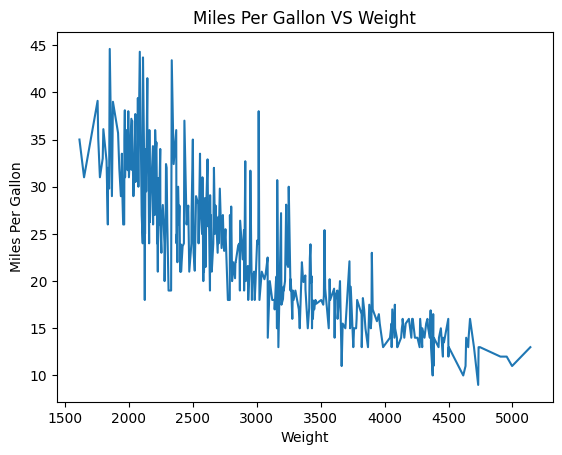

In [13]:
mpg_mean_weight = df.groupby("weight")["mpg"].mean()

mpg_mean_weight.plot(kind="line")

plt.title("Miles Per Gallon VS Weight")
plt.xlabel("Weight")
plt.ylabel("Miles Per Gallon")
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42)





In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((313, 3), (79, 3), (313,), (79,))

In [ ]:
def predictor(X_train, X_test, y_train, y_test, model):
    # 1) Skala features
    scaler = MinMaxScaler().fit(X_train)        
    X_train_scaled = scaler.transform(X_train)       
    X_test_scaled  = scaler.transform(X_test)        

    # 2) Träna linjär regression
    model.fit(X_train_scaled, y_train)

    # 3) Prediktioner och metrics
    y_pred = model.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    
    return model, scaler, y_pred, mae, mse, rmse

model, scaler, y_pred, mae, mse, rmse = predictor(X_train, X_test, y_train, y_test )

print(f"MAE:  {mae:.2f}")
print(f"MSE:  {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE:  3.46
MSE:  17.68
RMSE: 4.20


supervised learning - inlärning med input och uptput, features och label
machine learning - datorer lär sig mönster från data istället för att bli hårdkodade
data science - yrke som samlar in, analysrer och presenterar data
data engineering - Bygger systemen som kan användas av en tex, data scientist
algorithm - En ritning för hur ett visst probelm ska lösas	
regression - Ett sätt att kunna predicta ett värde, tex huspris eller aktiekurs?
classification - Ett sätt att gruppera klasser, tex studieteknik 
qualitative data - Data som inte är nummer/siffror. tex färg, djur, kön
quantitative data - Data som är nummer/siffror
independent variable - Inputvariabel för att predicera något	
dependent variable - Värdet man vill predicsrea
label - Samma som dependent variable? VÄrdet man vill predicera
feature	- variablerna som man tränar sin modell på
model - Olika typer av modeller används för olika sätt att predicera labels på. 
training - När vi tränar en modell på att poredicera
evaluation - Man testar modellen hur bra den är , mse, mae osv
prediction - Den färsiga modellens gissning 

## Linear regression on house dataset


In [23]:
df = pd.read_csv("../../data/house_prices.csv")
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [34]:
df.shape

df_cleaned = df.drop(["date", "waterfront", "view", "country", "condition", "statezip"], axis=1)
df_cleaned.shape
df_cleaned.price

0       3.130000e+05
1       2.384000e+06
2       3.420000e+05
3       4.200000e+05
4       5.500000e+05
            ...     
4595    3.081667e+05
4596    5.343333e+05
4597    4.169042e+05
4598    2.034000e+05
4599    2.206000e+05
Name: price, Length: 4600, dtype: float64

In [42]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   sqft_above     4600 non-null   int64  
 7   sqft_basement  4600 non-null   int64  
 8   yr_built       4600 non-null   int64  
 9   yr_renovated   4600 non-null   int64  
 10  street         4600 non-null   object 
 11  city           4600 non-null   object 
dtypes: float64(4), int64(6), object(2)
memory usage: 431.4+ KB
